# Reading The Data
- Using pynwb

In [2]:
from pynwb import NWBHDF5IO, NWBFile, TimeSeries
from pynwb.behavior import Position, SpatialSeries
from pynwb.epoch import TimeIntervals
from pynwb.file import Subject
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from itertools import count

# Exploring functionalies of nwb module

In [3]:
#!pip install nwbwidgets
from nwbwidgets import nwb2widget

io = NWBHDF5IO("../M442571/sub-442571_ses-20190227T134351_behavior+ecephys+ogen.nwb", mode="r")
nwbfile = io.read()

# nwb2widget(nwbfile)

#Suppose to give overall structure of nwb file but encountering unexpected error.

In [4]:
nwbfile.subject

subject pynwb.file.Subject at 0x1385613858080
Fields:
  age__reference: birth
  date_of_birth: 2018-10-29 00:00:00-05:00
  description: SC022
  sex: M
  species: Mus musculus
  subject_id: 442571

In [38]:
import glob
nwb_files = glob.glob("..\M442571\*.nwb")
nwb_io = []

for name in nwb_files:
    io = NWBHDF5IO(name, mode="r").read()
    nwb_io.append(io)
    
trials_df = []
for i in range(len(nwb_files)):
    trials_df.append(nwb_io[i].trials.to_dataframe().drop(['trial','task','trial_uid', 'photostim_power','photostim_duration','auto_water', 'free_water'],axis=1))
    trials_df[i]['ses_no'] = i+1

In [39]:
trials_df[2]

,start_time,stop_time,photostim_onset,task_protocol,trial_instruction,early_lick,outcome,ses_no
id,,,,,,,,
0,0.0000,5.1839,N/A,1,right,no early,hit,3
1,7.3320,12.3457,N/A,1,right,no early,hit,3
2,14.1719,19.1044,N/A,1,right,no early,hit,3
3,20.9126,27.6263,N/A,1,right,early,hit,3
4,29.4829,33.4770,N/A,1,left,no early,miss,3
...,...,...,...,...,...,...,...,...
496,3705.9632,3710.8885,N/A,1,right,no early,hit,3
497,3713.1598,3717.0091,N/A,1,left,no early,miss,3
498,3719.2850,3724.2899,2.034,1,right,no early,hit,3


In [40]:
units_df = []
for i in range(len(nwb_files)):
    units_df.append(nwb_io[i].units.to_dataframe().query("classification == 'good'").reset_index())
    units_df[i]['ses_no'] = i+1

In [41]:
units_df[2]

,id,unit,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,...,classification,anno_name,is_good_trials,spike_times,obs_intervals,electrodes,electrode_group,waveform_mean,waveform_sd,ses_no
0,6,6,30000,good,27.0,280.0,77.881122,3.517072,0.021385,5.847500,...,good,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[0.8537871695716341, 0.8694205882373778, 3.052...","[[0.0, 5.1839], [7.332, 12.3457], [14.1719, 19...",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[2.876076426264801, 2.4017761033369216, 2.5834...",[nan],3
1,7,7,30000,good,27.0,280.0,98.906726,3.871341,0.039590,19.107900,...,good,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[0.10124972863810244, 0.15788337109673423, 0.1...","[[0.0, 5.1839], [7.332, 12.3457], [14.1719, 19...",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[-0.12623856707317072, -0.39300685975609756, -...",[nan],3
2,8,8,30000,good,11.0,300.0,115.461163,4.560621,0.006901,13.709300,...,good,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[0.11411646553570787, 0.17468346279723468, 0.3...","[[0.0, 5.1839], [7.332, 12.3457], [14.1719, 19...",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[-1.1912448347107438, -1.084710743801653, -1.4...",[nan],3
3,10,10,30000,good,43.0,300.0,148.281563,6.055302,0.001814,17.782900,...,good,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[0.03291602231662205, 0.10434974555902787, 0.1...","[[0.0, 5.1839], [7.332, 12.3457], [14.1719, 19...",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[6.570492728184554, 6.349517301905718, 6.15910...",[nan],3
4,12,12,30000,multi,59.0,320.0,198.392116,8.675792,1.000000,0.506059,...,good,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[12.273676174953287, 14.953953163040183, 35.33...","[[0.0, 5.1839], [7.332, 12.3457], [14.1719, 19...",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[2.681697354771784, 2.0082339211618256, 1.8307...",[nan],3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,1562,306,30000,good,27.0,2480.0,194.218241,6.082603,0.039922,3.864700,...,good,Caudoputamen,"[True, True, True, True, True, True, True, Tru...","[11.873317590097292, 12.057953344210514, 30.46...","[[0.0, 5.1839], [7.332, 12.3457], [14.1719, 19...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[3.013029315960912, 2.4429967426710095, 2.5117...",[nan],3
390,1573,317,30000,good,27.0,3320.0,102.625512,3.445368,0.000000,1.247810,...,good,"Primary motor area, Layer 6b","[True, True, True, True, True, True, True, Tru...","[7.420192538013276, 7.502926956086757, 7.77773...","[[0.0, 5.1839], [7.332, 12.3457], [14.1719, 19...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[1.944750945775536, 1.1822194199243379, 0.6354...",[nan],3
391,1577,321,30000,good,11.0,3420.0,128.171999,4.460710,0.000000,3.699340,...,good,"Primary motor area, Layer 6a","[True, True, True, True, True, True, True, Tru...","[0.1584933981134422, 0.26326143840552607, 0.33...","[[0.0, 5.1839], [7.332, 12.3457], [14.1719, 19...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[1.154582860385925, 1.24769438138479, 0.665082...",[nan],3
392,1578,322,30000,good,43.0,3500.0,137.670477,3.888624,0.000000,0.668790,...,good,"Primary motor area, Layer 6a","[True, True, True, True, True, True, True, Tru...","[4.908422341626257, 31.420383963589746, 38.740...","[[0.0, 5.1839], [7.332, 12.3457], [14.1719, 19...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[1.9574175824175823, 1.7145800627943484, 1.563...",[nan],3


# Data Cleaning

In [42]:
import ast

In [43]:
units_df[2].electrodes.apply(lambda x: ast.literal_eval(x.location.values[0])['brain_regions']).value_counts()

left ALM          142
left Striatum     130
right ALM          73
right Striatum     49
Name: electrodes, dtype: int64

In [44]:
units_df[2]['anno_name'].unique()

array(['Anterior olfactory nucleus', 'Olfactory areas',
       'Orbital area, lateral part, layer 2/3',
       'Orbital area, lateral part, layer 5', 'Frontal pole, layer 5',
       'Secondary motor area, layer 5', 'Secondary motor area, layer 2/3',
       'Secondary motor area, layer 1',
       'Orbital area, ventrolateral part, layer 2/3',
       'Orbital area, ventrolateral part, layer 5',
       'Substantia innominata', 'Pallidum',
       'Globus pallidus, external segment', 'Caudoputamen',
       'Primary somatosensory area, upper limb, layer 6a',
       'Primary somatosensory area, upper limb, layer 5',
       'Nucleus accumbens', 'Primary motor area, Layer 6a',
       'Primary motor area, Layer 5', 'Primary motor area, Layer 6b'],
      dtype=object)

## Making Data Useable

In [45]:
pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop = [],[],[],[],[],[],[],[]
for name in nwb_files:  
    with NWBHDF5IO(name, "r") as io:
        read_nwbfile = io.read()
        #print(read_nwbfile.acquisition["BehavioralEvents"]["trialend_start_times"].timestamps[:4])
        #print(read_nwbfile.acquisition["BehavioralEvents"]["trialend_stop_times"].timestamps[:4])
        pre_start.append(read_nwbfile.acquisition["BehavioralEvents"]["presample_start_times"].timestamps[:])
        pre_stop.append(read_nwbfile.acquisition["BehavioralEvents"]["presample_stop_times"].timestamps[:])
        sample_start.append(read_nwbfile.acquisition["BehavioralEvents"]["sample_start_times"].timestamps[:])
        sample_stop.append(read_nwbfile.acquisition["BehavioralEvents"]["sample_stop_times"].timestamps[:])
        delay_start.append(read_nwbfile.acquisition["BehavioralEvents"]["delay_start_times"].timestamps[:])
        delay_stop.append(read_nwbfile.acquisition["BehavioralEvents"]["delay_stop_times"].timestamps[:])
        go_start.append(read_nwbfile.acquisition["BehavioralEvents"]["go_start_times"].timestamps[:])
        go_stop.append(read_nwbfile.acquisition["BehavioralEvents"]["go_stop_times"].timestamps[:])
    
def Clean_data(pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop):
    for i in range(len(pre_start)):
        sample_start[i] = np.intersect1d(pre_stop[i], sample_start[i])
        sample_stop[i] = np.intersect1d(sample_stop[i], delay_start[i])
        delay_start[i] = np.intersect1d(delay_start[i], sample_stop[i])
        delay_stop[i] = np.intersect1d(delay_stop[i], go_start[i])
    return pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop

pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop = Clean_data(pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop)

In [46]:
len(sample_start[0]),len(trials_df[0])

(0, 540)

In [47]:
for i in range(len(nwb_files)):
    trials_df[i] = trials_df[i].assign(pre_start = pre_start[i],
                             pre_stop = pre_stop[i],
                             sample_start = pre_stop[i],
                             sample_stop = sample_stop[i],
                             delay_start = delay_start[i],
                             delay_stop = delay_stop[i],
                             go_start = go_start[i],
                             go_stop = go_stop[i])
    units_df[i]['Region'] = units_df[i].electrodes.apply(lambda x: ast.literal_eval(x.location.values[0])['brain_regions'])
units_df[3]

,id,unit,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,...,anno_name,is_good_trials,spike_times,obs_intervals,electrodes,electrode_group,waveform_mean,waveform_sd,ses_no,Region
0,8,8,30000,good,11.0,140.0,309.120725,15.753093,0.000000,1.218400,...,Olfactory areas,"[True, True, True, True, True, True, True, Tru...","[1.4704246345219634, 1.5651918184595088, 3.276...","[[0.0, 4.858], [6.6988, 11.5216], [13.3283, 18...",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[6.251842570754716, 6.1081220518867925, 5.5000...",[nan],4,left ALM
1,12,12,30000,good,43.0,180.0,193.539943,7.919230,0.000000,0.555464,...,Olfactory areas,"[True, True, True, True, True, True, True, Tru...","[3.724336937126615, 7.030151498239428, 7.12748...","[[0.0, 4.858], [6.6988, 11.5216], [13.3283, 18...",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[1.812952430196484, 1.6844945708376424, 1.7887...",[nan],4,left ALM
2,16,16,30000,good,59.0,200.0,164.414377,5.506920,0.000000,0.643108,...,Olfactory areas,"[True, True, True, True, True, True, True, Tru...","[0.4249189278033141, 1.2895903141346312, 1.796...","[[0.0, 4.858], [6.6988, 11.5216], [13.3283, 18...",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[-0.9362432975871313, -1.6085790884718498, -1....",[nan],4,left ALM
3,18,18,30000,good,11.0,220.0,98.483080,3.791703,0.066684,3.365830,...,Olfactory areas,"[True, True, True, True, True, True, True, Tru...","[0.19915102882019875, 0.21861780174300094, 0.2...","[[0.0, 4.858], [6.6988, 11.5216], [13.3283, 18...",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[2.1878198567041967, 2.1950166325486182, 1.935...",[nan],4,left ALM
4,21,22,30000,good,43.0,260.0,174.190582,7.639306,0.000000,0.812937,...,Olfactory areas,"[True, True, True, True, True, True, True, Tru...","[27.655887001454047, 33.28308638247567, 39.371...","[[0.0, 4.858], [6.6988, 11.5216], [13.3283, 18...",l...,17216703352 1-301 pynwb.ecephys.ElectrodeGroup...,"[-1.2228260869565217, -1.4713679745493107, -2....",[nan],4,left ALM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,1643,381,30000,good,59.0,1520.0,201.482089,8.727527,0.047861,5.406030,...,Caudoputamen,"[True, True, True, True, True, True, True, Tru...","[0.07216077235234852, 0.1950290499586549, 0.35...","[[0.0, 4.858], [6.6988, 11.5216], [13.3283, 18...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[2.0268352674066596, 1.8352674066599393, 1.260...",[nan],4,right Striatum
394,1647,385,30000,good,59.0,1960.0,89.456408,3.327838,1.000000,3.006900,...,Caudoputamen,"[True, True, True, True, True, True, True, Tru...","[0.2701633683863851, 0.32586409868484933, 3.21...","[[0.0, 4.858], [6.6988, 11.5216], [13.3283, 18...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[1.814436712184874, 1.7134978991596639, 1.4205...",[nan],4,right Striatum
395,1652,390,30000,good,43.0,2420.0,135.469730,7.819230,0.021615,1.924710,...,Caudoputamen,"[True, True, True, True, True, True, True, Tru...","[3.687141502099694, 8.044276861207736, 29.6989...","[[0.0, 4.858], [6.6988, 11.5216], [13.3283, 18...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[1.7755681818181819, 2.0817006269592477, 2.326...",[nan],4,right Striatum
396,1662,400,30000,multi,27.0,3320.0,112.257632,4.064687,1.000000,1.044830,...,Caudoputamen,"[True, True, True, True, True, True, True, Tru...","[4.0068456937768735, 14.772939767121391, 17.04...","[[0.0, 4.858], [6.6988, 11.5216], [13.3283, 18...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[2.467512376237624, 2.0807549504950495, 2.0291...",[nan],4,right Striatum


In [48]:
#Aggregating Data
trial_result = pd.DataFrame()
unit_result = pd.DataFrame()
for i in range(len(nwb_files)):
    trial_result = pd.concat([trial_result, trials_df[i]])
    unit_result = pd.concat([unit_result, units_df[i]])
trial_result

,start_time,stop_time,photostim_onset,task_protocol,trial_instruction,early_lick,outcome,ses_no,pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop
id,,,,,,,,,,,,,,,,
0,0.0000,3.4044,N/A,1,right,no early,miss,1,0.5000,0.5100,0.5100,1.8304,1.8304,3.0304,3.0304,3.0804
1,5.3151,8.8108,N/A,1,right,no early,miss,1,5.8151,5.8251,5.8251,7.2614,7.2614,8.4614,8.4614,8.5114
2,10.7451,15.9229,N/A,1,right,no early,hit,1,11.2451,11.2551,11.2551,12.7979,12.7979,13.9979,13.9979,14.0479
3,18.0372,22.0577,N/A,1,right,early,miss,1,18.5372,18.5472,18.5472,20.3658,20.3658,21.5658,21.5658,21.6158
4,24.4746,29.5754,N/A,1,right,no early,hit,1,24.9746,24.9846,24.9846,26.4755,26.4755,27.6755,27.6755,27.7255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,4816.6539,4821.6086,N/A,1,right,no early,hit,5,4817.1539,4817.1639,4817.1639,4818.5930,4818.5930,4819.7930,4819.7930,4819.8430
688,4824.0835,4827.7330,N/A,1,left,no early,miss,5,4824.5835,4824.5935,4824.5935,4825.9078,4825.9078,4827.1078,4827.1078,4827.1578
689,4830.2074,4835.1997,N/A,1,right,no early,hit,5,4830.7074,4830.7174,4830.7174,4832.1719,4832.1719,4833.3719,4833.3719,4833.4219


In [49]:
units_df_ag = unit_result
trials_df_ag = trial_result

## Spike Rate Plotting

In [50]:
trials_Data = trials_df_ag.query("photostim_onset == 'N/A' and outcome == 'hit' ")
units_Data = units_df_ag.query(" Region == 'right ALM' and classification == 'good'")

In [51]:
units_Data

,id,unit,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,...,anno_name,is_good_trials,spike_times,obs_intervals,electrodes,electrode_group,waveform_mean,waveform_sd,ses_no,Region
82,294,4,30000,good,27.0,40.0,67.483108,3.835642,0.047974,8.291690,...,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[0.1557136098225418, 0.20868063990129881, 0.24...","[[0.0, 3.4044], [5.3151, 8.8108], [10.7451, 15...",...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[-0.5044106606606606, -0.33314564564564564, -0...",[nan],1,right ALM
83,298,9,30000,good,43.0,60.0,98.259353,5.506630,1.000000,0.450798,...,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[7.8266623116679135, 7.830262336368043, 7.8373...","[[0.0, 3.4044], [5.3151, 8.8108], [10.7451, 15...",...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[2.031992280285036, 2.1405507719714967, 1.9568...",[nan],1,right ALM
84,302,13,30000,good,11.0,100.0,67.971159,3.892653,0.036321,5.207880,...,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[1.0082527925124616, 1.2407877212911949, 1.251...","[[0.0, 3.4044], [5.3151, 8.8108], [10.7451, 15...",...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[0.3227774922918808, 0.3059159815005139, 0.168...",[nan],1,right ALM
85,304,16,30000,good,43.0,100.0,92.369749,5.025610,0.000000,0.328121,...,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[0.38918187833834583, 0.3942819133301958, 0.57...","[[0.0, 3.4044], [5.3151, 8.8108], [10.7451, 15...",...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[2.714620717781403, 2.561684339314845, 2.48139...",[nan],1,right ALM
86,315,27,30000,good,27.0,320.0,47.455584,2.401599,0.021908,1.846050,...,Anterior olfactory nucleus,"[True, True, True, True, True, True, True, Tru...","[0.4359821994400286, 0.6606170740157, 15.07287...","[[0.0, 3.4044], [5.3151, 8.8108], [10.7451, 15...",...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[2.3342322335025383, 2.1462563451776653, 2.067...",[nan],1,right ALM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,660,249,30000,multi,59.0,1800.0,105.144121,4.032540,1.000000,0.270374,...,"Frontal pole, layer 5","[True, True, True, True, True, True, True, Tru...","[63.5834058381595, 63.88600791434597, 76.83057...","[[0.0, 4.9979], [6.7982, 11.7046], [13.4942, 1...",...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[1.1237157534246576, 0.9952910958904109, 0.966...",[nan],5,right ALM
200,662,251,30000,good,11.0,2180.0,148.498613,6.425040,0.000000,0.778997,...,"Secondary motor area, layer 5","[True, True, True, True, True, True, True, Tru...","[17.478906635426082, 102.64199570560109, 273.9...","[[0.0, 4.9979], [6.7982, 11.7046], [13.4942, 1...",...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[2.160412262156448, 2.1158165961945032, 1.3626...",[nan],5,right ALM
201,665,254,30000,good,59.0,2280.0,60.033348,2.895586,0.091491,0.821829,...,"Secondary motor area, layer 5","[True, True, True, True, True, True, True, Tru...","[14.79555489131828, 36.23422738013508, 42.5520...","[[0.0, 4.9979], [6.7982, 11.7046], [13.4942, 1...",...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[1.681487975951904, 1.7002755511022045, 1.6697...",[nan],5,right ALM
202,667,256,30000,good,11.0,2420.0,69.961592,3.356860,1.000000,0.736578,...,"Secondary motor area, layer 2/3","[True, True, True, True, True, True, True, Tru...","[0.4107807716041827, 0.43948096851942253, 0.48...","[[0.0, 4.9979], [6.7982, 11.7046], [13.4942, 1...",...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[2.88320530726257, 2.291375698324022, 2.173533...",[nan],5,right ALM


# New data based on Delay range [1.0,1.2]




In [52]:
trials_Data = trials_Data.query(" (delay_stop - delay_start) > 1 and (delay_stop - delay_start) < 1.3")
trials_Data = trials_Data.query(" (stop_time - start_time) < 5.3")
trials_Data

,start_time,stop_time,photostim_onset,task_protocol,trial_instruction,early_lick,outcome,ses_no,pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop
id,,,,,,,,,,,,,,,,
2,10.7451,15.9229,N/A,1,right,no early,hit,1,11.2451,11.2551,11.2551,12.7979,12.7979,13.9979,13.9979,14.0479
4,24.4746,29.5754,N/A,1,right,no early,hit,1,24.9746,24.9846,24.9846,26.4755,26.4755,27.6755,27.6755,27.7255
6,37.9940,42.9214,N/A,1,right,no early,hit,1,38.4940,38.5040,38.5040,39.8576,39.8576,41.0576,41.0576,41.1076
7,46.9091,51.9549,N/A,1,right,no early,hit,1,47.4091,47.4191,47.4191,48.7843,48.7843,49.9843,49.9843,50.0343
12,80.2918,85.3428,N/A,1,left,no early,hit,1,80.7918,80.8018,80.8018,82.2942,82.2942,83.4942,83.4942,83.5442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,4809.3330,4814.1808,N/A,1,left,no early,hit,5,4809.8330,4809.8430,4809.8430,4811.1498,4811.1498,4812.3498,4812.3498,4812.3998
687,4816.6539,4821.6086,N/A,1,right,no early,hit,5,4817.1539,4817.1639,4817.1639,4818.5930,4818.5930,4819.7930,4819.7930,4819.8430
689,4830.2074,4835.1997,N/A,1,right,no early,hit,5,4830.7074,4830.7174,4830.7174,4832.1719,4832.1719,4833.3719,4833.3719,4833.4219


# Plotting with phases

In [53]:
def get_smooth_gauss(spike_data,sigma,color,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(1001)/200) - 1)
    freq = (hist/len(dataset))*200
    width = np.diff(edges)
    smooth_gauss = []

    for i in edges[1:]:
        gauss = np.exp((- ( edges[1:] - i) ** 2) / ( 2 * (sigma**2) ) )
        gauss /=  sum(gauss)
        smooth_gauss.append(sum(gauss*freq))
    plt.plot(edges[1:],smooth_gauss,color=color)
    #plt.plot(edges[1:],freq)
    
    #return freq,edges[1:],smooth_gauss
    
def return_smooth_gauss(spike_data,sigma,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(1001)/200) - 1)
    freq = (hist/len(dataset))*200
    width = np.diff(edges)
    smooth_gauss = []

    for i in edges[1:]:
        gauss = np.exp((- ( edges[1:] - i) ** 2) / ( 2 * (sigma**2) ) )
        gauss /=  sum(gauss)
        smooth_gauss.append(sum(gauss*freq))
    
    return freq,edges[1:],smooth_gauss

In [54]:
trials_Data_L = trials_Data[ trials_Data['trial_instruction'] == 'left']
trials_Data_R = trials_Data[ trials_Data['trial_instruction'] == 'right']

# def get_firing_rate_graph(Trial_Data1,Trial_Data2,sigma):
#     after = 4.35
#     before = -0.7
#     spike_data = []
    
#     for unit in units_Data.reset_index()['id'][:20]:
#         unit_spike_times = units_Data["spike_times"][unit]
#         trial_spikes_l = []
#         trial_spikes_r = []
#         i = 0
#         for time in Trial_Data1['sample_start']:
#             # Compute spike times relative to stimulus onset
#             aligned_spikes1 = unit_spike_times - time
#             # Keep only spike times in a given time window around the stimulus onset
#             aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
#             aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
#             trial_spikes_l.append(aligned_spikes1)
            
#         for time in Trial_Data2['sample_start']:
#             # Compute spike times relative to stimulus onset
#             aligned_spikes = unit_spike_times - time
#             # Keep only spike times in a given time window around the stimulus onset
#             aligned_spikes = aligned_spikes[aligned_spikes < after ]
#             aligned_spikes = aligned_spikes[before < aligned_spikes]
#             trial_spikes_r.append(aligned_spikes)            
            
#         fig, axs = plt.subplots(1, 1, sharex="all")
        
        
#         plt.xlabel("time (s)")
        
#         get_smooth_gauss(trial_spikes_l,sigma,'r',trials_Data_L)
#         get_smooth_gauss(trial_spikes_r,sigma,'b',trials_Data_R)
#         axs.set_ylabel("Freq (Hz)")
#         axs.axvline(0, color=[0.5, 0.5, 0.5])
#         axs.axvline(0.65, color=[0.5, 0.5, 0.5])
#         axs.axvline(1.85, color=[0.5, 0.5, 0.5])
#         axs.axvline(3.35, color=[0.5, 0.5, 0.5])
        
#         axs.text(0.1,0,'Sample',rotation=90)
#         axs.text(0.75,0,'Delay',rotation=90)
#         axs.text(1.95,0,'Go',rotation=90)
#         axs.text(-0.4,0,'Pre-Sample',rotation=90)
# get_firing_rate_graph(trials_Data_L,trials_Data_R,0.05)

In [55]:
len(trials_Data_L),len(trials_Data_R)

(800, 817)

In [56]:
def get_firing_rate_over_neurons(Trial_Data1,Trial_Data2,sigma):
    after = 4.3
    before = -0.7
    spike_data_l = []
    spike_data_r = []
    
    for session in range(1,len(nwb_files)+1):
        temp_data_l = Trial_Data1.query("ses_no == @session") 
        temp_data_r = Trial_Data2.query("ses_no == @session") 
        temp_unit = units_Data.query("ses_no == @session")
        for unit in temp_unit.reset_index()['index']:
            unit_spike_times = temp_unit["spike_times"][unit]
            trial_spikes_l = []
            trial_spikes_r = []
            i = 0
            for time in temp_data_l['sample_start']:
                # Compute spike times relative to stimulus onset
                aligned_spikes = unit_spike_times - time
                # Keep only spike times in a given time window around the stimulus onset
                aligned_spikes = aligned_spikes[aligned_spikes < after ]
                aligned_spikes = aligned_spikes[before < aligned_spikes]
                trial_spikes_l.append(aligned_spikes)

            frq_l,edge,smooth_l = return_smooth_gauss(trial_spikes_l,sigma,temp_data_l)    
            spike_data_l.append(smooth_l)

            for time in temp_data_r['sample_start']:
                # Compute spike times relative to stimulus onset
                aligned_spikes = unit_spike_times - time
                # Keep only spike times in a given time window around the stimulus onset
                aligned_spikes = aligned_spikes[aligned_spikes < after ]
                aligned_spikes = aligned_spikes[before < aligned_spikes]
                trial_spikes_r.append(aligned_spikes)

            frq_r,edge,smooth_r = return_smooth_gauss(trial_spikes_r,sigma,temp_data_r)    
            spike_data_r.append(smooth_r)    
        
    return spike_data_l,spike_data_r,edge

l,r,edges = get_firing_rate_over_neurons(trials_Data_L,trials_Data_R,0.1)

In [28]:
# avg_left_rate = np.array(l).mean(axis=0)
# avg_right_rate = np.array(r).mean(axis=0)


# fig, axs = plt.subplots(1, 1, sharex="all")
# axs.plot(edges,avg_left_rate,c='r')
# axs.plot(edges,avg_right_rate,c='b')
# axs.axvline(0, color=[0.5, 0.5, 0.5])
# axs.axvline(0.65, color=[0.5, 0.5, 0.5])
# axs.axvline(1.85, color=[0.5, 0.5, 0.5])
# axs.axvline(3.35, color=[0.5, 0.5, 0.5])

# axs.text(0.1,0,'Sample',rotation=90)
# axs.text(0.75,0,'Delay',rotation=90)
# axs.text(1.95,0,'Go',rotation=90)
# axs.text(-0.4,0,'Pre-Sample',rotation=90)
# axs.set_ylabel("Freq (Hz)")
# axs.legend(['Left','Right'])
# plt.show()

In [57]:
diff_cd = (-np.array(l)+np.array(r))

delay_avg_diff = diff_cd[:,449:570].mean(axis=1)
response_avg_diff = diff_cd[:,569:690].mean(axis=1)

newly_l = np.array(l).T.dot(delay_avg_diff)
newly_r = np.array(r).T.dot(delay_avg_diff)

In [58]:
#Delay period CD Apply (Yet to finish)    (**FINISHED**)
# diff_cd = (np.array(l)-np.array(r)).mean(axis=1)
# newly_l = np.array(l).T.dot(diff_cd)
# newly_r = np.array(r).T.dot(diff_cd)

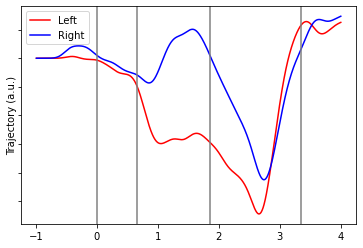

In [59]:
fig, axs = plt.subplots(1, 1, sharex="all")
axs.plot(edges,newly_l,c='r')
axs.plot(edges,newly_r,c='b')
axs.axvline(0, color=[0.5, 0.5, 0.5])
axs.axvline(0.65, color=[0.5, 0.5, 0.5])
axs.axvline(1.85, color=[0.5, 0.5, 0.5])
axs.axvline(3.35, color=[0.5, 0.5, 0.5])

# axs.text(0.1,-3000,'Sample',rotation=90)
# axs.text(0.75,-3000,'Delay',rotation=90)
# axs.text(1.95,-3000,'Go',rotation=90)
# axs.text(-0.4,-3000,'Pre-Sample',rotation=90)
axs.set_ylabel("Trajectory (a.u.)")
axs.tick_params(labelleft = False)
axs.legend(['Left','Right'])
plt.show()

# For Striatum

In [32]:
units_df_ag['Region'].unique()

array(['left ALM', 'right ALM', 'left Striatum', 'right Striatum'],
      dtype=object)

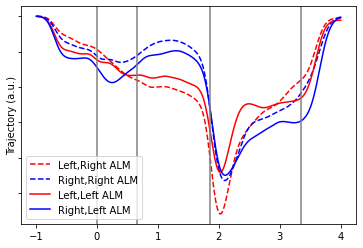

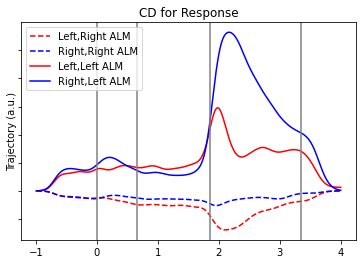

In [33]:
trials_Data = trials_df_ag.query("photostim_onset == 'N/A' and outcome == 'hit' ")
units_Data = units_df_ag.query(" Region == 'left ALM' and classification == 'good'")

trials_Data = trials_Data.query(" (delay_stop - delay_start) > 1 and (delay_stop - delay_start) < 1.3")
trials_Data = trials_Data.query(" (stop_time - start_time) < 5.3")

trials_Data_L = trials_Data[ trials_Data['trial_instruction'] == 'left']
trials_Data_R = trials_Data[ trials_Data['trial_instruction'] == 'right']

st_l,st_r,edges = get_firing_rate_over_neurons(trials_Data_L,trials_Data_R,0.1)

diff_cd = (-np.array(st_l)+np.array(st_r))
delay_avg_diff_lalm = diff_cd[:,449:569].mean(axis=1)
response_avg_diff_lalm = diff_cd[:,569:690].mean(axis=1)
newly_l_st = np.array(st_l).T.dot(delay_avg_diff_lalm)
newly_r_st = np.array(st_r).T.dot(delay_avg_diff_lalm)

fig, axs = plt.subplots(1, 1, sharex="all")
axs.plot(edges,newly_l,c='r',ls='--')
axs.plot(edges,newly_r,c='b',ls='--')
axs.plot(edges,newly_l_st,c='r')
axs.plot(edges,newly_r_st,'b')
axs.axvline(0, color=[0.5, 0.5, 0.5])
axs.axvline(0.65, color=[0.5, 0.5, 0.5])
axs.axvline(1.85, color=[0.5, 0.5, 0.5])
axs.axvline(3.35, color=[0.5, 0.5, 0.5])

# axs.text(0.1,-3000,'Sample',rotation=90)
# axs.text(0.75,-3000,'Delay',rotation=90)
# axs.text(1.95,-3000,'Go',rotation=90)
# axs.text(-0.4,-3000,'Pre-Sample',rotation=90)
axs.set_ylabel("Trajectory (a.u.)")
axs.tick_params(labelleft = False)
axs.legend(['Left,Right ALM','Right,Right ALM','Left,Left ALM','Right,Left ALM'])
plt.show()

newly_l_st = np.array(st_l).T.dot(response_avg_diff_lalm)
newly_r_st = np.array(st_r).T.dot(response_avg_diff_lalm)
newly_l = np.array(l).T.dot(response_avg_diff)
newly_r = np.array(r).T.dot(response_avg_diff)

fig, axs = plt.subplots(1, 1, sharex="all")
plt.title('CD for Response')
axs.plot(edges,newly_l,c='r',ls='--')
axs.plot(edges,newly_r,c='b',ls='--')
axs.plot(edges,newly_l_st,c='r')
axs.plot(edges,newly_r_st,'b')
axs.axvline(0, color=[0.5, 0.5, 0.5])
axs.axvline(0.65, color=[0.5, 0.5, 0.5])
axs.axvline(1.85, color=[0.5, 0.5, 0.5])
axs.axvline(3.35, color=[0.5, 0.5, 0.5])

# axs.text(0.1,-3000,'Sample',rotation=90)
# axs.text(0.75,-3000,'Delay',rotation=90)
# axs.text(1.95,-3000,'Go',rotation=90)
# axs.text(-0.4,-3000,'Pre-Sample',rotation=90)
axs.set_ylabel("Trajectory (a.u.)")
axs.tick_params(labelleft = False)
axs.legend(['Left,Right ALM','Right,Right ALM','Left,Left ALM','Right,Left ALM'])
plt.show()

In [34]:
from numpy import arccos, array
from numpy.linalg import norm
import math
def angles(u, v): 
    return arccos(u.dot(v)/(norm(u)*norm(v)))
print(math.degrees(angles(delay_avg_diff, response_avg_diff)), math.degrees(angles(delay_avg_diff_lalm, response_avg_diff_lalm)))

70.5613306609712 102.79141422921333


# Distribution during delay and go phase

In [30]:
def get_phases_rate_graph(Trial_Data1,Trial_Data2,sigma):

    spike_data = []
    
    for unit in units_Data.reset_index().id:
        unit_spike_times = units_Data["spike_times"][unit]
        trial_spikes_go_l = []
        trial_spikes_go_r = []
        trial_spikes_delay_l = []
        trial_spikes_delay_r = []
        trial_sample_l = []
        trial_sample_r = []
        
    
        for time in Trial_Data1['sample_start']:
            # Compute spike times relative to stimulus onset
            
            after = 3.35
            before = 1.85
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_go_l.append(aligned_spikes1)
            
            after = 1.85
            before = 0.65
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_delay_l.append(aligned_spikes1)
            
            after = 0.65
            before = 0
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_sample_l.append(aligned_spikes1)
            
        for time in Trial_Data2['sample_start']:
            # Compute spike times relative to stimulus onset
            
            after = 3.35
            before = 1.85
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_go_r.append(aligned_spikes1)
            
            after = 1.85
            before = 0.65
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_delay_r.append(aligned_spikes1)        
            
            after = 0.65
            before = 0
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_sample_r.append(aligned_spikes1)   
              
    return trial_sample_l, trial_sample_r, trial_spikes_go_l,trial_spikes_go_r,trial_spikes_delay_l,trial_spikes_delay_r     

def get_freq_edge(spike_data,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(31)/20) + 1.80)
    freq = (hist/len(dataset))*20
    return freq,edges[1:]

def get_freq_edge_1(spike_data,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(25)/20) + 0.60)
    freq = (hist/len(dataset))*20
    return freq,edges[1:]

def get_freq_edge_2(spike_data,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(14)/20) + 0)
    freq = (hist/len(dataset))*20
    return freq,edges[1:]


sample_l, sample_r, go_l,go_r,delay_l,delay_r = get_phases_rate_graph(trials_Data_L,trials_Data_R,0.1)
freq_sample_l,edges2 = get_freq_edge_2(sample_l,trials_Data_L)
freq_sample_r,edges2 = get_freq_edge_2(sample_r,trials_Data_R)
freq_go_l,edges = get_freq_edge(go_l,trials_Data_L)
freq_go_r,edges = get_freq_edge(go_r,trials_Data_R)
freq_delay_l,edges1 = get_freq_edge_1(delay_l,trials_Data_L)
freq_delay_r,edges1 = get_freq_edge_1(delay_r,trials_Data_R)

<AxesSubplot:ylabel='Density'>

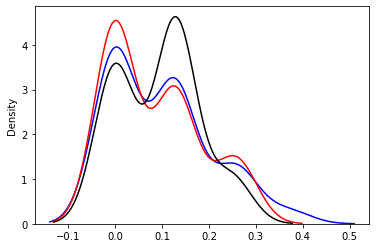

In [31]:
#Delay vs Go(Phases vs Phases)(Yet to finish)
sns.kdeplot(list(freq_go_l) + list(freq_go_r), c='b')
sns.kdeplot(list(freq_delay_l) + list(freq_delay_r), c='r')
sns.kdeplot(list(freq_sample_l) + list(freq_sample_r), c='black')

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([0.        , 0.01234568, 0.02469136, 0.03703704, 0.04938272,
        0.0617284 , 0.07407407, 0.08641975, 0.09876543, 0.11111111,
        0.12345679, 0.13580247, 0.14814815, 0.16049383, 0.17283951,
        0.18518519, 0.19753086, 0.20987654, 0.22222222, 0.2345679 ,
        0.24691358]),
 <BarContainer object of 20 artists>)

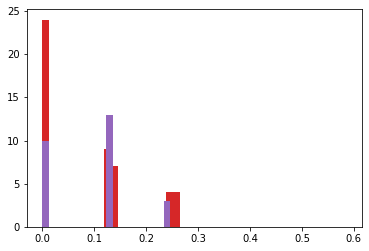

In [32]:
plt.hist(list(freq_go_r) + list(freq_go_l), bins=20)
plt.hist(list(freq_delay_r) + list(freq_delay_l), bins=20)
plt.hist(list(freq_sample_r) + list(freq_sample_l), bins=20)